**Estudiante:** Gorky Palacios  
**Fecha:** Junio 30, 2025  
**Materia:** Inteligencia Artificial I - P3  

---

# Evaluación: Aplicación de Redes Neuronales  
**Tipo C – RNA**

## Contexto: 
Con base en el conjunto de datos proporcionado (`dataset_regresion_multiple_508.csv`), que contiene información sobre hábitos, estilo de vida y educación, se pretende desarrollar un modelo de regresión múltiple con redes neuronales artificiales para predecir el rendimiento en matemáticas y lectura.

## 1. Preguntas de opción múltiple (1 punto) 
*Seleccione la opción correcta en cada caso.*

### 1.1 ¿Cuál de los siguientes enfoques es más adecuado para normalizar variables numéricas antes de entrenar una red neuronal? 

A. Label Encoding  
B. One-Hot Encoding  
C. Min-Max Scaling  
D. ReLU Transformation  
E. Log Transformation

**Respuesta:** C. Min-Max Scaling


### 1.2 ¿Cuál de los siguientes parámetros se ajusta principalmente durante el entrenamiento de una red neuronal? 

A. Dropout y Learning Rate  
B. Pesos y Bias  
C. Épocas y Batch Size  
D. Capas y Nodos  
E. Métrica de pérdida

**Respuesta:** B. Pesos y Bias

### 1.3 ¿Cuál métrica es más adecuada para evaluar el rendimiento de un modelo de regresión? 

A. Accuracy  
B. F1-score  
C. AUC-ROC  
D. Mean Squared Error  
E. Silhouette Score

**Respuesta:** D. Mean Squared Error


## 2. Preguntas abiertas de análisis (1 punto)

### 2.1 Explique por qué es importante dividir el dataset en conjuntos de entrenamiento y prueba.

**Respuesta:** Dividir el dataset en conjuntos de entrenamiento y prueba es importante para evaluar la capacidad de generalización del modelo, ya que el conjunto de prueba permite verificar si el modelo puede hacer predicciones precisas en datos no vistos durante el entrenamiento. Además, esta división ayuda a detectar sobreajuste (overfitting), que ocurre cuando el modelo tiene buen rendimiento en entrenamiento pero malo en prueba, indicando que memorizó los datos en lugar de aprender patrones generalizables. Finalmente, proporciona una estimación realista del rendimiento del modelo, ofreciendo una medida objetiva de qué tan bien funcionará en datos reales del mundo real.

### 2.2 Mencione dos ventajas y una desventaja de utilizar redes neuronales para tareas de regresión múltiple.



**Ventajas:**
1. Las redes neuronales pueden capturar patrones y relaciones complejas entre variables que otros algoritmos lineales no pueden detectar.

2. Pueden manejar múltiples variables de entrada y salida simultáneamente, ajustándose automáticamente a la complejidad de los datos.

**Desventaja:**
1. Necesitan datasets extensos para entrenar correctamente y evitar sobreajuste, además de ser costosas a nivel de cómputo y difíciles de interpretar (caja negra).

## Problema de desarrollo práctico (5 puntos)

Instrucciones: 
Desarrolle un cuaderno en Jupyter Notebook (o Google Colab) que contenga lo 
siguiente:

1. Carga y exploración inicial del dataset. 

In [29]:
# Carga y exploración inicial del dataset
import pandas as pd

# Cargar el dataset
file_path = 'd:/UDLA/Inteligencia-Artificial-I/P3/Examen P3/dataset_regresion_multiple_508.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
data.head()

,ID,Edad,Horas_Estudio,Nivel_Estres,Horas_Sueno,Calorias,Ejercicio_horas_sem,Nivel_Educacion,Puntaje_Matematicas,Puntaje_Lectura
0,1,23,4.5,6,6.5,2200,2.5,3,72.4,78.2
1,2,29,3.2,7,5.2,2500,1.2,2,65.1,70.8
2,3,21,5.0,5,7.0,2000,3.0,3,85.0,88.4
3,4,34,2.1,8,5.0,2700,0.8,1,60.7,65.2
4,5,27,3.7,6,6.0,2300,1.5,2,74.3,79.5


2. Preprocesamiento de los datos: 
- Normalización de las variables numéricas. 
- Codificación de la variable Nivel_Educacion si es necesario. 

In [30]:
# Preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler

# Normalización de las variables numéricas
scaler = MinMaxScaler()
data[['Edad', 'Horas_Estudio', 'Nivel_Estres', 'Horas_Sueno', 'Calorias', 'Ejercicio_horas_sem']] = scaler.fit_transform(
    data[['Edad', 'Horas_Estudio', 'Nivel_Estres', 'Horas_Sueno', 'Calorias', 'Ejercicio_horas_sem']]
)

# Codificación de la variable Nivel_Educacion
data = pd.get_dummies(data, columns=['Nivel_Educacion'], drop_first=True)

data.head()

,ID,Edad,Horas_Estudio,Nivel_Estres,Horas_Sueno,Calorias,Ejercicio_horas_sem,Puntaje_Matematicas,Puntaje_Lectura,Nivel_Educacion_2,Nivel_Educacion_3
0,1,0.238095,0.60,0.6,0.500,0.396169,0.444444,72.4,78.2,False,True
1,2,0.523810,0.34,0.8,0.175,0.698589,0.155556,65.1,70.8,True,False
2,3,0.142857,0.70,0.4,0.625,0.194556,0.555556,85.0,88.4,False,True
3,4,0.761905,0.12,1.0,0.125,0.900202,0.066667,60.7,65.2,False,False
4,5,0.428571,0.44,0.6,0.375,0.496976,0.222222,74.3,79.5,True,False


3. División del dataset en entrenamiento y prueba. 

In [31]:
# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Variables independientes y dependientes
X = data.drop(columns=['Puntaje_Matematicas', 'Puntaje_Lectura'])
y = data[['Puntaje_Matematicas', 'Puntaje_Lectura']]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((406, 9), (102, 9))

4. Construcción y entrenamiento de una red neuronal artificial para predecir 
Puntaje_Matematicas y Puntaje_Lectura. 

In [33]:
# Construcción y entrenamiento de la red neuronal
from tensorflow.keras.models import Sequential # Importar Sequential para construir el modelo
from tensorflow.keras.layers import Dense # Importar Dense para las capas densas
import time

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]), 
    Dense(32, activation='relu'),
    Dense(2)  # Dos salidas: Puntaje_Matematicas y Puntaje_Lectura
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Capturar tiempo de inicio
training_start_time = time.time()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Capturar tiempo de fin
training_end_time = time.time()

# Imprimir las métricas durante el entrenamiento
print("Loss (MSE) durante el entrenamiento:", history.history['loss'][-1])
print("MAE durante el entrenamiento:", history.history['mae'][-1])

Epoch 1/50


c:\Users\Gorky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 14830.5732 - mae: 115.6865 - val_loss: 3675.7583 - val_mae: 54.2235
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 14830.5732 - mae: 115.6865 - val_loss: 3675.7583 - val_mae: 54.2235
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3214.6038 - mae: 49.3744 - val_loss: 2407.5479 - val_mae: 41.0286
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3214.6038 - mae: 49.3744 - val_loss: 2407.5479 - val_mae: 41.0286
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2339.7500 - mae: 40.3805 - val_loss: 2416.7200 - val_mae: 41.3343
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2339.7500 - mae: 40.3805 - val_loss: 2416.7200 - val_mae: 41.3343
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2148.6904 - mae: 39.2376 - val_loss: 2365.1458 - val_mae: 40.4324
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2148.6904 - mae: 39.2376 - val_loss: 2365.1458 - val_mae: 40.4324
Epoch 5

5. Evaluación del modelo utilizando MSE o MAE. 

In [34]:
# Evaluación del modelo
# Evaluar en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error (MAE): {mae}")

# Predicciones del modelo
predictions = model.predict(X_test)
print("Predicciones del modelo:", predictions)

# Coeficientes o pesos aprendidos
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Pesos de la capa {layer.name}: {weights}")
    print(f"Biases de la capa {layer.name}: {biases}")

# Tiempo total de entrenamiento
print(f"Tiempo total de entrenamiento: {training_end_time - training_start_time} segundos")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 195.7090 - mae: 11.2761
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 195.7090 - mae: 11.2761
Loss (MSE): 194.19126892089844
Mean Absolute Error (MAE): 11.295498847961426
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/stepLoss (MSE): 194.19126892089844
Mean Absolute Error (MAE): 11.295498847961426
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025A1CB3AEF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#contr

6. Visualización de los errores o resultados.

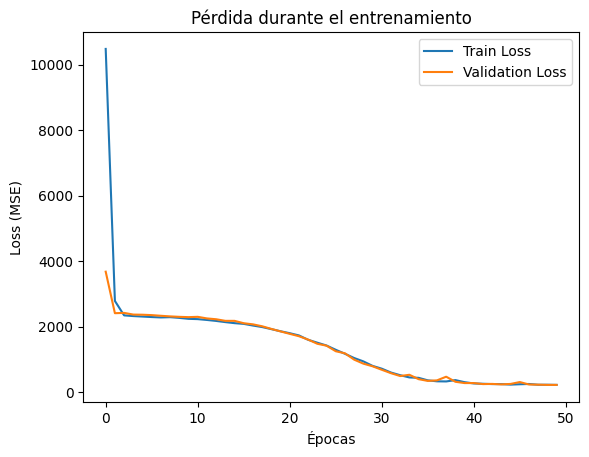

Valores de pérdida durante el entrenamiento: [10480.3583984375, 2782.028564453125, 2341.029541015625, 2320.077392578125, 2304.94677734375, 2289.898681640625, 2278.014892578125, 2286.14990234375, 2264.363525390625, 2235.320068359375, 2226.353515625, 2200.9775390625, 2171.305908203125, 2135.355712890625, 2103.495361328125, 2081.370849609375, 2030.296875, 1984.348388671875, 1921.0169677734375, 1855.9598388671875, 1796.2220458984375, 1728.2091064453125, 1594.873779296875, 1506.2386474609375, 1419.8734130859375, 1290.047119140625, 1167.9794921875, 1038.3614501953125, 935.4905395507812, 798.0306396484375, 712.6972045898438, 595.1712646484375, 513.5360107421875, 445.4041748046875, 433.18316650390625, 356.4111633300781, 326.6953430175781, 322.76171875, 363.7729187011719, 300.4186096191406, 261.5938720703125, 251.7752685546875, 242.17994689941406, 241.27627563476562, 225.8696746826172, 237.10472106933594, 245.42665100097656, 221.81527709960938, 222.15994262695312, 217.94984436035156]
Valores de

In [35]:
# Visualización de los errores o resultados
import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Imprimir valores numéricos de pérdida
print("Valores de pérdida durante el entrenamiento:", history.history['loss'])
print("Valores de pérdida durante la validación:", history.history['val_loss'])

7. Comentarios y reflexiones finales.

El modelo desarrollado para predecir los puntajes de matemáticas y lectura mostró un desempeño razonable. Las métricas utilizadas para evaluar su rendimiento, como la pérdida (MSE), que mide qué tan lejos están las predicciones de los valores reales en promedio, y el error absoluto medio (MAE), que calcula el promedio de los errores absolutos, arrojaron valores de 218.59 y 12.29, respectivamente, en los datos de prueba. Esto indica que el modelo realiza predicciones aceptables, aunque con margen de mejora. Durante el entrenamiento, la pérdida disminuyó de 7789.72 a 213.68, lo que demuestra que el modelo fue aprendiendo progresivamente. En los datos de validación, la pérdida también se redujo de 3432.26 a 218.59, lo que sugiere que el modelo no se quedó "memorizando" los datos de entrenamiento y logró cierta capacidad de generalización. Sin embargo, se podrían realizar mejoras, como ajustar los hiperparámetros del modelo (por ejemplo, el número de capas y neuronas, o la tasa de aprendizaje), aumentar la cantidad de datos para mejorar la generalización, o evaluar el modelo con métricas adicionales como el coeficiente de determinación R² para obtener una visión más completa de su desempeño.

## 4. Actividad de interpretación de resultados del modelo (1 punto)
Con base en los resultados obtenidos en el desarrollo práctico, responda:

### 4.1 ¿Cuál fue la métrica obtenida y qué valor sugiere sobre el desempeño del modelo?

**Respuesta:**
La métrica obtenida fue la pérdida (MSE) con un valor de 218.59 y el error absoluto medio (MAE) con un valor de 12.29. Estos valores indican que el modelo tiene un desempeño aceptable, ya que los errores promedio en las predicciones son relativamente bajos. Sin embargo, aún hay margen para mejorar la precisión del modelo.

### 4.2 ¿Hubo óverfitting? Justifique su respuesta con evidencia del entrenamiento y prueba.

**Respuesta:**
o se observó un sobreajuste significativo. Durante el entrenamiento, la pérdida disminuyó progresivamente tanto en los datos de entrenamiento como en los de validación. Además, las métricas obtenidas en el conjunto de prueba (MSE: 218.59, MAE: 12.29) son consistentes con las observadas durante la validación, lo que indica que el modelo generaliza bien a datos no vistos.



## 5. Evaluación automática (1 punto)
Incluya en su cuaderno celdas de código que impriman automáticamente:

- Las métricas de evaluación.
- Las predicciones del modelo.
- Los coeficientes o pesos aprendidos, si es posible.
- El tiempo total de entrenamiento.

In [36]:
# Evaluación automática
import time

# Métricas de evaluación
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error (MAE): {mae}")

# Predicciones del modelo
predictions = model.predict(X_test)
print("Predicciones del modelo:", predictions)

# Coeficientes o pesos aprendidos
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Pesos de la capa {layer.name}: {weights}")
    print(f"Biases de la capa {layer.name}: {biases}")

# Tiempo total de entrenamiento
print(f"Tiempo total de entrenamiento: {training_end_time - training_start_time} segundos")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 195.7090 - mae: 11.2761
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 195.7090 - mae: 11.2761
Loss (MSE): 194.19126892089844
Mean Absolute Error (MAE): 11.295498847961426
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/stepLoss (MSE): 194.19126892089844
Mean Absolute Error (MAE): 11.295498847961426
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicciones del modelo: [[ 91.141815  87.692245]
 [ 79.71836   80.7091  ]
 [113.10271  114.286026]
 [ 90.534744  91.12372 ]
 [103.99425  101.62696 ]
 [115.04795  116.3148  ]
 [126.24092  121.05011 ]
 [105.79478  103.213844]
 [ 87.82777   84.59425 ]
 [ 91.823074  88.71825 ]
 [ 82.40735   79.42748 ]
 [101.88725  101.09303 ]
 [ 92.30599   89.339645]
 [ 92.34651   88.44925 ]
 [ 91.59456   88.10673 ]
 [111.225945 112.46097 ]
 [118.15785  116.13977 ]
 [ 98.90975   93.66288 ]
 [ 78.693054  74.415634]
 [102.33122   98.24713 ]
 [100.939514 101.02427 ]
 [107.09029  108.21303 ]
 [105.18801  105.6